In [5]:

# A1 - Neural Networks and Regression (Testing Implementations)

import numpy as np
import matplotlib.pyplot as plt

# Import your three implementations
from NeuralNet import NeuralNet                   # BP-M (from scratch)
from neuralnet_torch import NeuralNetTorch        # BP-F (PyTorch)
from mlr_sklearn import MultipleLinearRegressionSK  # MLR-F (scikit-learn)


In [6]:
#Dataset Base

# XOR dataset (non-linear) for BP
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
Z_xor = np.array([[0],[1],[1],[0]], dtype=np.float32)

# Linear dataset - for Regression
X_lin = np.array([
    [1.0, 2.0],
    [2.0, 0.0],
    [3.0, 1.0],
    [4.0, 3.0],
    [5.0, 5.0],
], dtype=np.float64)

Z_lin = 2 * X_lin[:, 0] + 0.5 * X_lin[:, 1] + 1.0


Neural network has been initialized
Architecture (neurons per layer): [2, 3, 1]
Activation function used: sigmoid
 Layer 1: w(3, 2), theta(3, 1)
 Layer 2: w(1, 3), theta(1, 1)
Epoch 0: Train MSE=0.138812
Epoch 100: Train MSE=0.124450
Epoch 200: Train MSE=0.109139
Epoch 300: Train MSE=0.080409
Epoch 400: Train MSE=0.028269
Epoch 500: Train MSE=0.008519
Epoch 600: Train MSE=0.004268
Epoch 700: Train MSE=0.002716
Epoch 800: Train MSE=0.001952
Epoch 900: Train MSE=0.001507

Predictions BP-M (from scratch):
Input [0. 0.] -> Predicted output: 0.0467
Input [0. 1.] -> Predicted output: 0.9504
Input [1. 0.] -> Predicted output: 0.9501
Input [1. 1.] -> Predicted output: 0.0513


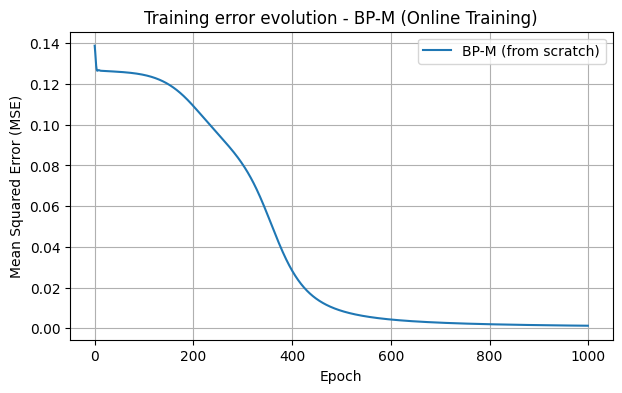

In [7]:

# Test 1: Neural Network - BP (from scratch)



# Create the manual neural network using the same parameters as in the assignment
net_manual = NeuralNet(
    [2, 3, 1],
    fact='sigmoid',
    eta=0.1,
    alpha=0.9,
    epochs=1000,
    val_split=0.0
)

# Training phase (each pattern is processed individually - online mode)
net_manual.fit(X_xor, Z_xor)

# Retrieve training errors per epoch
train_err_manual, _ = net_manual.loss_epochs()


# Predictions

# Evaluate one sample at a time (online mode)
pred_manual = np.array([net_manual.predict(x) for x in X_xor])

print("\nPredictions BP-M (from scratch):")
for i, (inp, pred) in enumerate(zip(X_xor, pred_manual)):
    print(f"Input {inp} -> Predicted output: {pred.ravel()[0]:.4f}")


# Training error plot

plt.figure(figsize=(7, 4))
plt.plot(train_err_manual, label="BP-M (from scratch)", color="tab:blue")
plt.title("Training error evolution - BP-M (Online Training)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()

Neural network (PyTorch) has been initialized
Architecture (neurons per layer): [2, 3, 1]
Activation function used: sigmoid
Epoch 0: Train MSE=0.295489
Epoch 100: Train MSE=0.250286
Epoch 200: Train MSE=0.249006
Epoch 300: Train MSE=0.240906
Epoch 400: Train MSE=0.165782
Epoch 500: Train MSE=0.008062
Epoch 600: Train MSE=0.000000
Epoch 700: Train MSE=0.000000
Epoch 800: Train MSE=0.000000
Epoch 900: Train MSE=0.000000

Predictions BP-F (PyTorch):
Input [0. 0.] -> Predicted output: 0.0000
Input [0. 1.] -> Predicted output: 1.0000
Input [1. 0.] -> Predicted output: 1.0000
Input [1. 1.] -> Predicted output: 0.0000


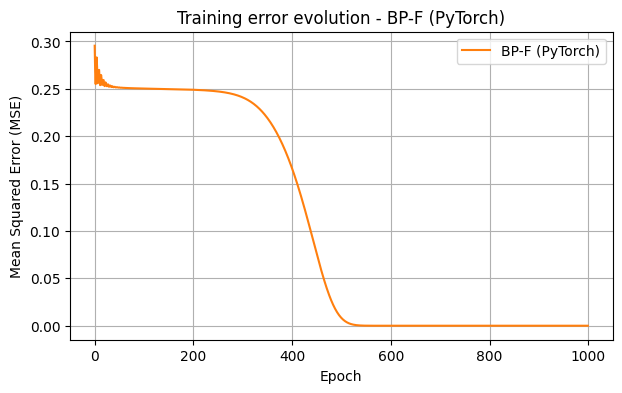

In [8]:

# Test 2: Neural Network - BP (PyTorch)


# Create the PyTorch neural network (same architecture and parameters)
net_torch = NeuralNetTorch(
    [2, 3, 1],
    fact='sigmoid',
    eta=0.1,
    alpha=0.9,
    epochs=1000,
    val_split=0.0
)

# Train the network
net_torch.fit(X_xor, Z_xor)

# Retrieve training errors
train_err_torch, _ = net_torch.loss_epochs()


# Predictions

pred_torch = net_torch.predict(X_xor)

print("\nPredictions BP-F (PyTorch):")
for i, (inp, pred) in enumerate(zip(X_xor, pred_torch)):
    print(f"Input {inp} -> Predicted output: {pred.ravel()[0]:.4f}")


# Training error plot

plt.figure(figsize=(7, 4))
plt.plot(train_err_torch, label="BP-F (PyTorch)", color="tab:orange")
plt.title("Training error evolution - BP-F (PyTorch)")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.legend()
plt.show()

MLR (scikit-learn) fitted
 - Train MSE: 0.000000 | Train R^2: 1.000000
 -  Val  MSE: 0.000000 |  Val  R^2: nan

Predictions MLR-F (scikit-learn):
Input [1. 2.] -> Predicted output: 4.0000
Input [2. 0.] -> Predicted output: 5.0000
Input [3. 1.] -> Predicted output: 7.5000
Input [4. 3.] -> Predicted output: 10.5000
Input [5. 5.] -> Predicted output: 13.5000

Learned coefficients:
Coef: [2.  0.5]
Intercept: 1.0000000000000018


C:\Users\juanj\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


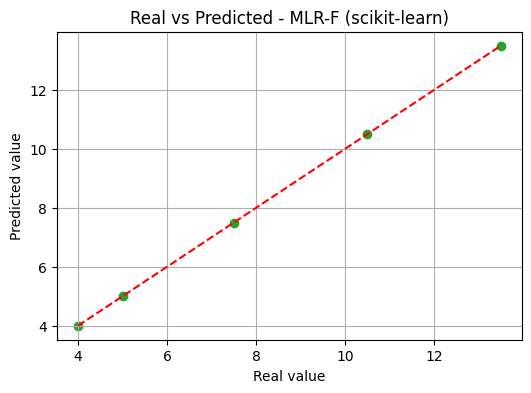

In [9]:

# Test 3: Multiple Linear Regression - MLR (scikit-learn)


# Create the regression model with 20% validation
mlr = MultipleLinearRegressionSK(val_split=0.2, scale=False)

# Train the model
mlr.fit(X_lin, Z_lin)

# Predictions
pred_lin = mlr.predict(X_lin)

print("\nPredictions MLR-F (scikit-learn):")
for i, (inp, pred) in enumerate(zip(X_lin, pred_lin)):
    print(f"Input {inp} -> Predicted output: {pred:.4f}")

# Print learned coefficients
print("\nLearned coefficients:")
print("Coef:", mlr.coef_)
print("Intercept:", mlr.intercept_)

# Plot real vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(Z_lin, pred_lin, color="tab:green")
plt.plot([Z_lin.min(), Z_lin.max()], [Z_lin.min(), Z_lin.max()], "r--")
plt.title("Real vs Predicted - MLR-F (scikit-learn)")
plt.xlabel("Real value")
plt.ylabel("Predicted value")
plt.grid(True)
plt.show()

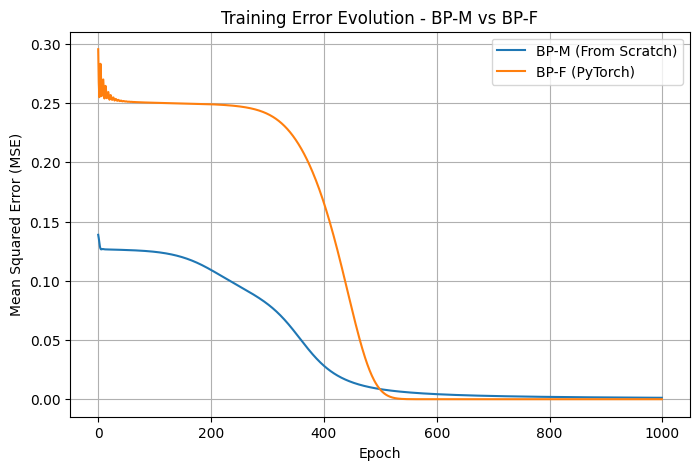

In [10]:

# Ccomparison between BP from Scratch and BP Pytorch


plt.figure(figsize=(8, 5))
plt.plot(train_err_manual, label="BP-M (From Scratch)", color="tab:blue")
plt.plot(train_err_torch, label="BP-F (PyTorch)", color="tab:orange")
plt.title("Training Error Evolution - BP-M vs BP-F")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()